In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow. keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn. model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

In [ ]:
print(tf. __version__)

2.18.0


In [ ]:
dataset_path = "/content/drive/MyDrive/new-plant-diseases-dataset"


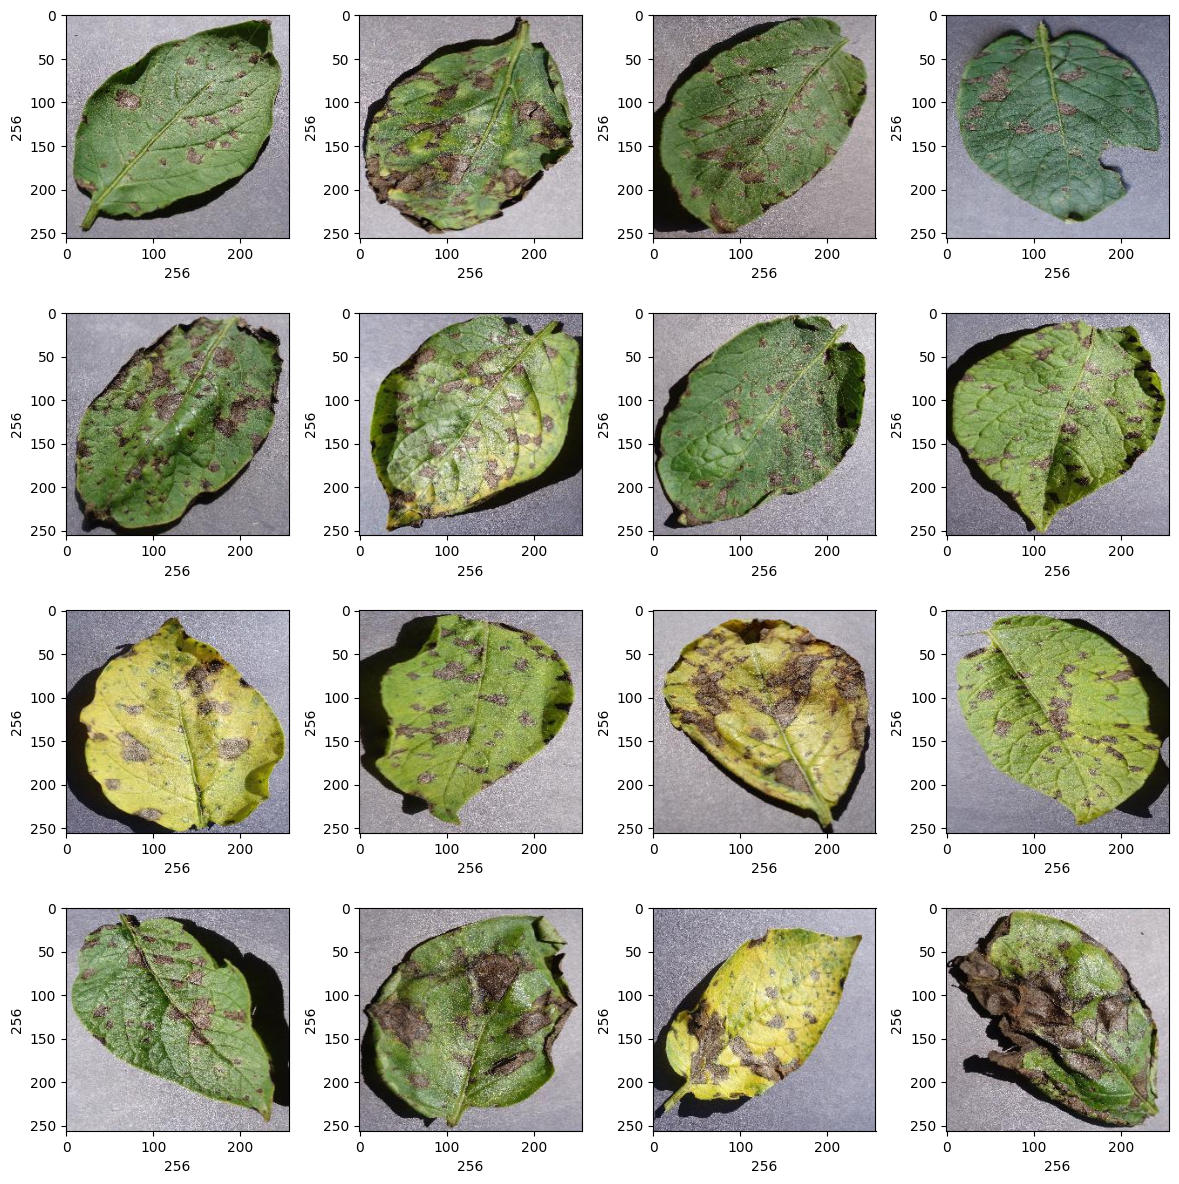

In [ ]:
# Plotting 12 images to check dataset

plt.figure(figsize = (12, 12))
dataset_path = "/content/drive/MyDrive/Plant_Disease_Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___Early_blight"

for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.tight_layout()
    rand_img = imread(dataset_path +'/'+ random.choice(sorted(os.listdir(dataset_path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10) # width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10) # height of image

In [ ]:
# Converting Images to array

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256, 256))
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
dataset_path = "/content/drive/MyDrive/Plant_Disease_Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
labels = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___healthy']

print(labels)


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___healthy']


In [ ]:
import os
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array

# Define dataset path
dataset_path = ""

# Labels to include
selected_labels = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy',
                   'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___healthy']

# Assign numeric labels
label_mapping = {label: idx for idx, label in enumerate(selected_labels)}

# Initialize lists
image_list, label_list = [], []

# Set max images per class
max_images_per_class = 500  # Adjust based on available memory

# Reading and converting images to arrays
for label in selected_labels:
    label_path = os.path.join(dataset_path, label)  # Full path to label folder
    if os.path.exists(label_path):  # Check if folder exists
        files = os.listdir(label_path)[:max_images_per_class]  # Limit number of images
        for file in files:
            image_path = os.path.join(label_path, file)
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.resize(image, (256, 256))  # Resize image
                image_list.append(img_to_array(image))  # Convert to array
                label_list.append(label_mapping[label])  # Append numeric label

print(f"✅ Processed {len(image_list)} images from selected labels.")


✅ Processed 3500 images from selected labels.


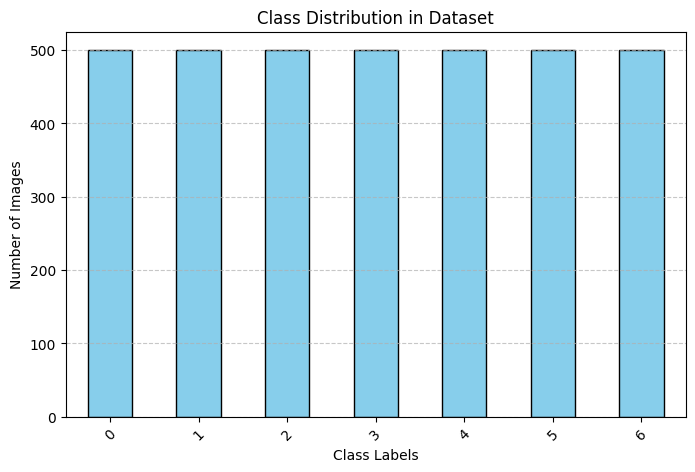

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert label_list to a Pandas DataFrame
label_counts = pd.Series(label_list).value_counts().sort_index()

# Plot the class distribution
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Class Labels")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Dataset")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Check if image_list is not empty before accessing an element
if len(image_list) > 0 and image_list[0] is not None:
    print("Shape of the first image:", image_list[0].shape)
else:
    print("⚠ No images found or conversion failed.")


Shape of the first image: (256, 256, 3)


In [ ]:
# Checking the total number of images (same as the length of label_list)
if len(label_list) > 0:
    label_list = np.array(label_list)
    print("Total number of images:", label_list.shape[0])
else:
    print("⚠ No labels found. Check your dataset path or preprocessing steps.")



Total number of images: 3500


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=10)


In [ ]:
# Normalizing the dataset (scaling pixel values between 0 and 1)
import numpy as np
x_train = np.array(x_train, dtype=np.float16) / 255.0
x_test = np.array(x_test, dtype=np.float16) / 255.0

# Reshaping the dataset to ensure correct dimensions for the model
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)


In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", input_shape=(256, 256, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))  # Helps prevent overfitting
model.add(Dense(7, activation="softmax"))  # Changed to 7 classes

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 85, 85, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 85, 85, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 42, 42, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28224)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,612,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,619,223 (13.81 MB)

 Trainable params: 3,619,223 (13.81 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.0001),  # Fine-tuning LR if needed
    metrics=["accuracy"]  # You can also add "categorical_accuracy"
)


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting train data into training & validation sets
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train,
    test_size=0.2,
    random_state=10,
    stratify=y_train  # Ensures class balance (if needed)
)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

epochs = 50
batch_size = 64  # Adjusted to avoid crashes

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping])


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 129s 4s/step - accuracy: 0.1663 - loss: 1.9645 - val_accuracy: 0.3411 - val_loss: 1.8257
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 140s 4s/step - accuracy: 0.3386 - loss: 1.7714 - val_accuracy: 0.4464 - val_loss: 1.6185
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.3957 - loss: 1.6138 - val_accuracy: 0.5161 - val_loss: 1.4575
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.4637 - loss: 1.4819 - val_accuracy: 0.6357 - val_loss: 1.3118
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 0.5033 - loss: 1.3533 - val_accuracy: 0.6411 - val_loss: 1.2046
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 138s 4s/step - accuracy: 0.5614 - loss: 1.2381 - val_accuracy: 0.6696 - val_loss: 1.1343
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.5905 - loss: 1.1566 - val_accuracy: 0.6750 - val_loss: 1.0353
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.6154 - loss: 1.1039 - val_accuracy: 0.7089 - v

In [ ]:
model.save("/content/drive/MyDrive/Plant_Disease_Dataset/plant_disease_model.h5")


In [ ]:
model.save("/content/drive/MyDrive/plant_disease_model.keras")



In [ ]:
import os

model_path = "/content/drive/MyDrive/plant_disease_model.keras"

if os.path.exists(model_path):
    print("✅ Model is successfully saved in Drive!")
else:
    print("❌ Model NOT found! Check the save path.")


✅ Model is successfully saved in Drive!


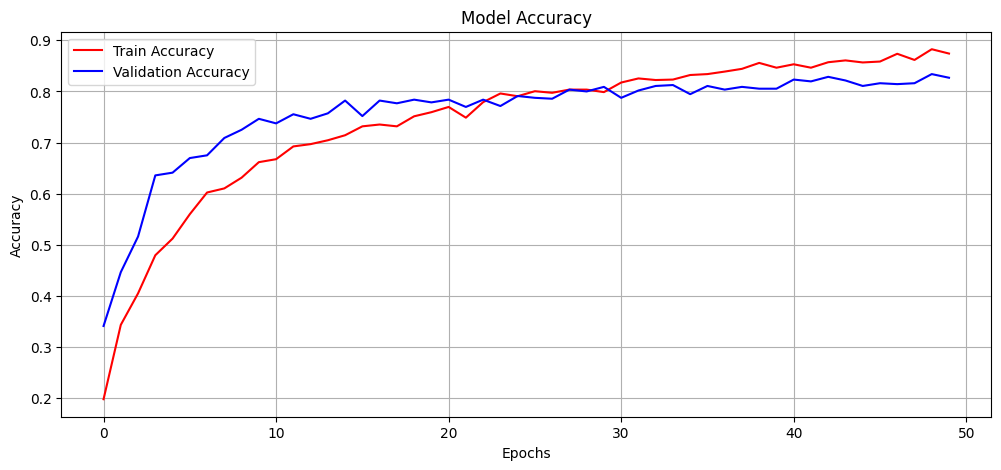

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], color='r', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='b', label='Validation Accuracy')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
print("Calculating model accuracy")

scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1] * 100}")

Calculating model accuracy
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 536ms/step - accuracy: 0.7939 - loss: 0.5573
Test Accuracy: 81.28571510314941


In [ ]:
y_pred = model.predict(x_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 492ms/step


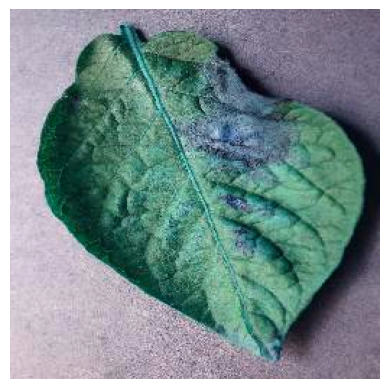

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt

# Convert the 12th test image back to a PIL image
img = array_to_img(x_test[11])

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide the axes
plt.show()



In [ ]:
print("Originally : ", selected_labels[np.argmax(y_test[11])])  # Actual label of the 12th image
print("Predicted : ", selected_labels[np.argmax(y_pred[11])])  # Predicted label for the 12th image (instead of 5th)
print("Prediction probabilities for the 3rd image: ", y_pred[2])  # Predicted probabilities for the 3rd image


Originally :  Potato___Late_blight
Predicted :  Potato___Late_blight
Prediction probabilities for the 3rd image:  [4.0759829e-08 4.6428087e-07 9.9998182e-01 2.3154179e-09 1.2661228e-07
 1.5609159e-05 1.8859588e-06]


In [ ]:
for i in range(50):
    print(selected_labels[np.argmax(y_test[i])], " ", selected_labels[np.argmax(y_pred[i])])


Tomato___Late_blight   Tomato___Late_blight
Tomato___healthy   Tomato___healthy
Potato___healthy   Potato___healthy
Potato___Early_blight   Potato___Early_blight
Tomato___Bacterial_spot   Tomato___Bacterial_spot
Tomato___healthy   Tomato___healthy
Tomato___Bacterial_spot   Tomato___Bacterial_spot
Potato___healthy   Potato___healthy
Potato___Late_blight   Potato___Late_blight
Potato___Late_blight   Tomato___Early_blight
Tomato___Bacterial_spot   Tomato___Bacterial_spot
Potato___Late_blight   Potato___Late_blight
Tomato___Early_blight   Tomato___Early_blight
Tomato___Bacterial_spot   Tomato___Bacterial_spot
Tomato___healthy   Tomato___healthy
Tomato___Late_blight   Potato___healthy
Tomato___Late_blight   Tomato___Late_blight
Tomato___Bacterial_spot   Tomato___Late_blight
Potato___Early_blight   Potato___Early_blight
Tomato___healthy   Tomato___healthy
Tomato___Late_blight   Tomato___Early_blight
Tomato___Late_blight   Potato___healthy
Tomato___Late_blight   Tomato___Late_blight
Tomato___